In [67]:
from glob import glob
import pickle
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

path2target = "/Users/y1u0d2/Downloads/OneDrive_1_2023-9-13/molecule/1/output_molecules"
pkl_files = glob(path2target + "/*.pkl")

# Molecule: Pair potentialを確認する

In [68]:
path2save = "/Users/y1u0d2/desktop/Lab/result/matlantis/pair_potential"

def get_bond_from_number(atomic_number_arr: np.ndarray):
    atomic_symbol_dict = {
        14: "Si",
        8: "O"
    }
    atomic_number_arr = list(map(lambda x: atomic_symbol_dict[x], atomic_number_arr))
    return "-".join(atomic_number_arr)

def load_molecules_from_matlantis(path2pickle: str):
    molecules = pickle.load(open(path2pickle, "rb"))

    pair_potential_dict = {
        "bond": [get_bond_from_number(molecule["atoms"]["numbers"]) for molecule in molecules],
        "distance": [molecule["distance"] for molecule in molecules],
        "energy": [molecule["total_energy"] for molecule in molecules]
    }

    if len(set(pair_potential_dict["bond"])) != 1:
        print(set(pair_potential_dict["bond"]))
        raise ValueError("Bond is not the same")

    pair_potential_df = pd.DataFrame(pair_potential_dict)
    pair_potential_df.sort_values(by=["distance"], inplace=True)
    pair_potential_df.reset_index(drop=True, inplace=True)
    
    return pair_potential_df

## Si-Si

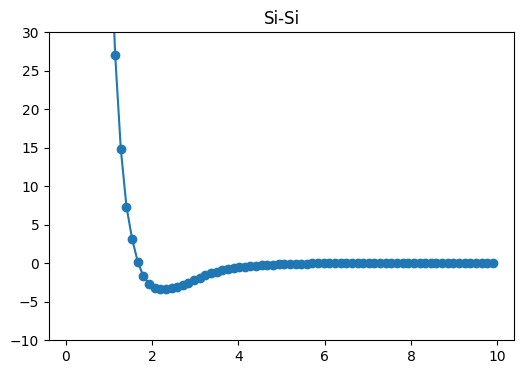

In [69]:
pair_potential_df = load_molecules_from_matlantis(pkl_files[0])

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(pair_potential_df["distance"], pair_potential_df["energy"], "o-")
ax.set_title(pair_potential_df["bond"][0])
ax.set_ylim(-10, 30)

# pair_potential_df.to_csv(os.path.join(path2save,  f"matlantis_{pair_potential_df['bond'][0]}.csv"), index=False)

## O-O

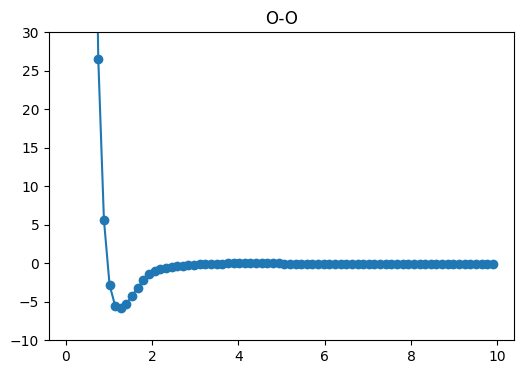

In [70]:
pair_potential_df = load_molecules_from_matlantis(pkl_files[1])

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(pair_potential_df["distance"], pair_potential_df["energy"], "o-")
ax.set_title(pair_potential_df["bond"][0])
ax.set_ylim(-10, 30)

# pair_potential_df.to_csv(os.path.join(path2save,  f"matlantis_{pair_potential_df['bond'][0]}.csv"), index=False)

## Si-O

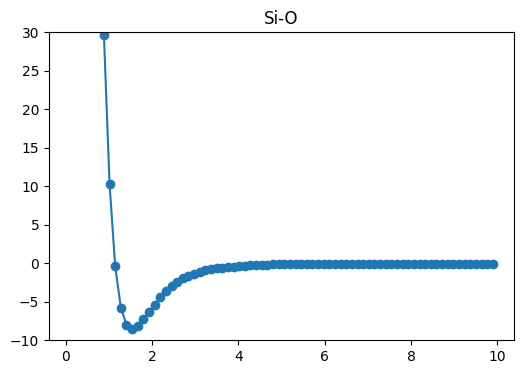

In [71]:
pair_potential_df = load_molecules_from_matlantis(pkl_files[2])

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(pair_potential_df["distance"], pair_potential_df["energy"], "o-")
ax.set_title(pair_potential_df["bond"][0])
ax.set_ylim(-10, 30)

# pair_potential_df.to_csv(os.path.join(path2save,  f"matlantis_{pair_potential_df['bond'][0]}.csv"), index=False)